In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [2]:
# Load the model
model = load_model('caries_gingivitis_model.keras')


C:\Users\isatyamks\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [3]:

# Load the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'data/TEST',
    target_size=(224, 224),  # Resize images to the expected input size of MobileNetV2
    batch_size=32,
    class_mode='binary',  # Use 'categorical' if you have more than 2 classes
    shuffle=False
)



Found 408 images belonging to 2 classes.


In [4]:
# Make predictions
y_true = test_generator.classes
y_pred = model.predict(test_generator, verbose=1)
y_pred = (y_pred >= 0.5).astype(int)  # For binary classification



C:\Users\isatyamks\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 483ms/step


In [5]:
# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")




Accuracy: 0.93
Precision: 0.90
Recall: 0.98
F1 Score: 0.94


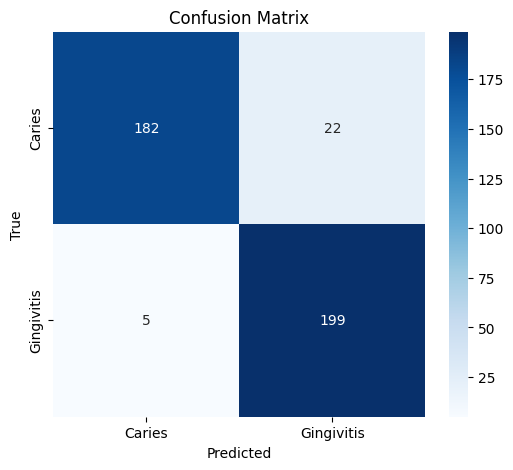

In [6]:
# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

labels = ['Caries', 'Gingivitis']
plot_confusion_matrix(y_true, y_pred, labels)

In [8]:
(199+182)/(182+22+199+5)*100


93.38235294117648

In [11]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.93
Precision: 0.90
Recall: 0.98
F1 Score: 0.94
